In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.naive_bayes import GaussianNB

In [18]:
data = pd.read_csv("/content/PS_20174392719_1491204439457_log.csv")
data.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0.0,0.0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0.0,0.0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1.0,0.0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1.0,0.0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0.0,0.0


In [22]:
data.isnull().sum()
data = data.dropna()
data.isnull().sum()
data = data[['amount','oldbalanceOrg','newbalanceOrig','oldbalanceDest','newbalanceDest',"isFraud","isFlaggedFraud"]]
data.head()

,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,9839.64,170136.0,160296.36,0.0,0.0,0.0,0.0
1,1864.28,21249.0,19384.72,0.0,0.0,0.0,0.0
2,181.00,181.0,0.00,0.0,0.0,1.0,0.0
3,181.00,181.0,0.00,21182.0,0.0,1.0,0.0
4,11668.14,41554.0,29885.86,0.0,0.0,0.0,0.0


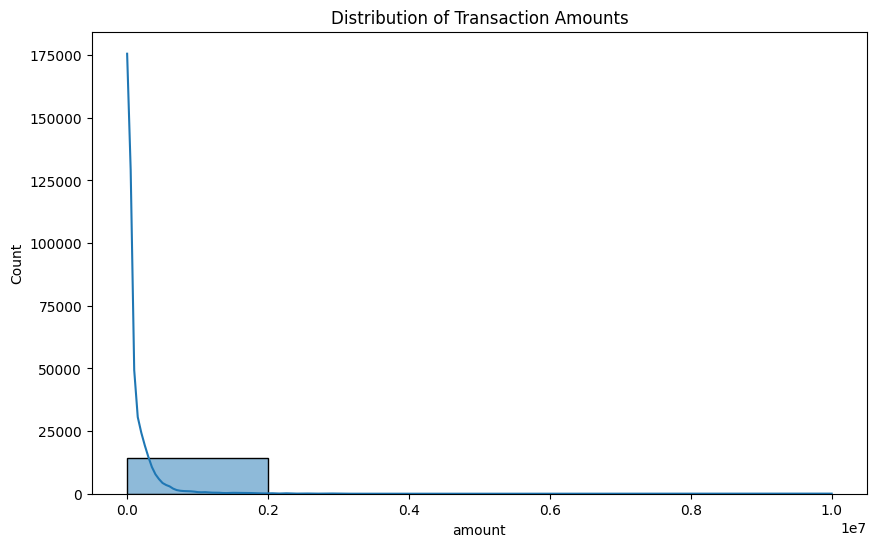

In [23]:
plt.figure(figsize=(10, 6))
sns.histplot(data['amount'], bins=5, kde=True)
plt.title('Distribution of Transaction Amounts')
plt.show()

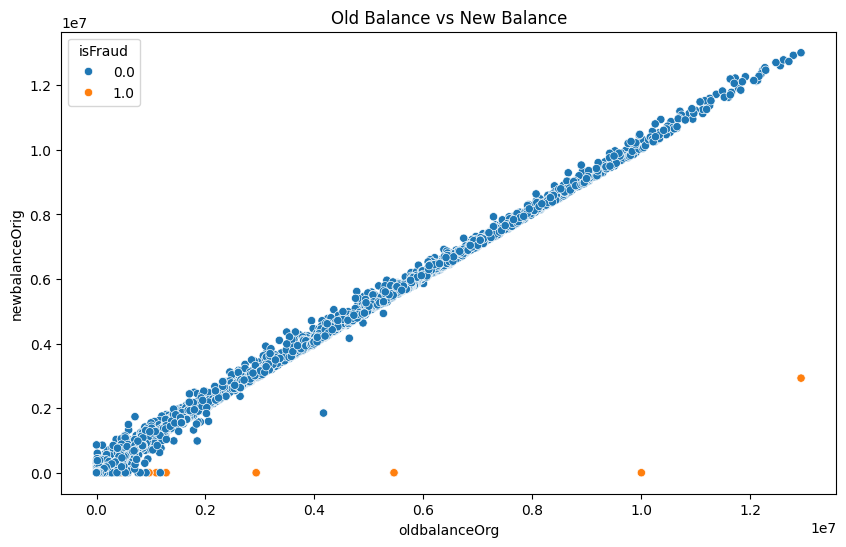

In [24]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='oldbalanceOrg', y='newbalanceOrig', hue='isFraud', data=data)
plt.title('Old Balance vs New Balance')
plt.show()

In [25]:
print(data.columns)

Index(['amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest',
       'newbalanceDest', 'isFraud', 'isFlaggedFraud'],
      dtype='object')


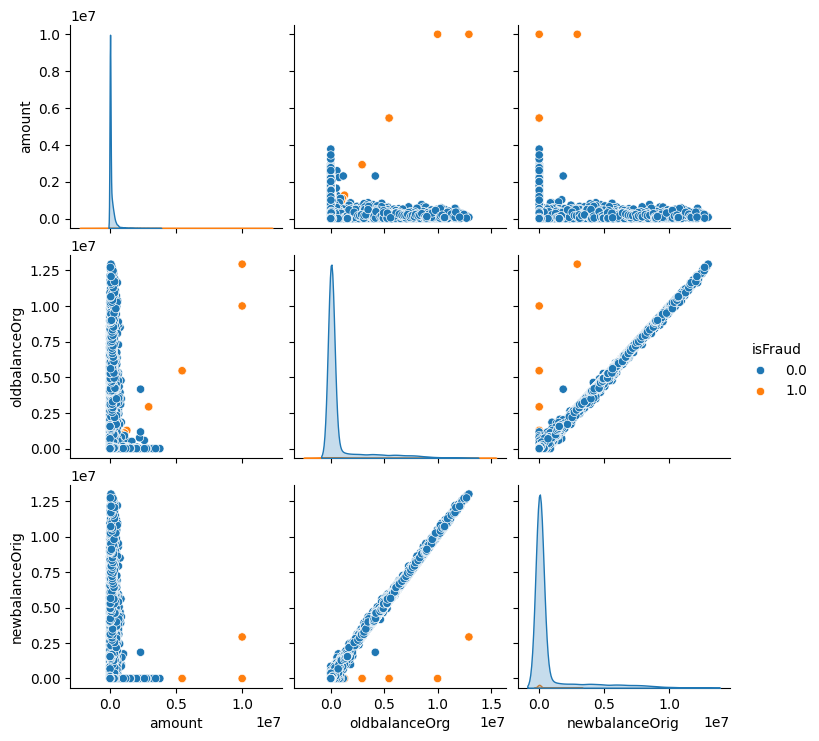

In [26]:
sns.pairplot(data[['amount', 'oldbalanceOrg', 'newbalanceOrig', 'isFraud']], hue='isFraud')
plt.show()

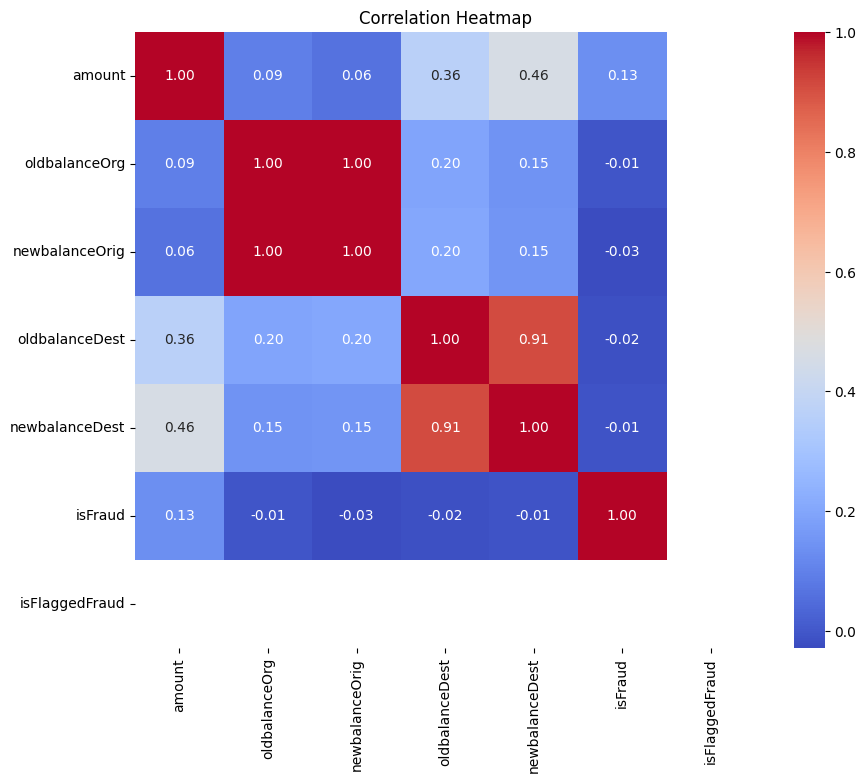

In [27]:
corr_matrix = data.corr()

# Generate a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [28]:
data['isFraud'].value_counts()
data.head()

,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,9839.64,170136.0,160296.36,0.0,0.0,0.0,0.0
1,1864.28,21249.0,19384.72,0.0,0.0,0.0,0.0
2,181.00,181.0,0.00,0.0,0.0,1.0,0.0
3,181.00,181.0,0.00,21182.0,0.0,1.0,0.0
4,11668.14,41554.0,29885.86,0.0,0.0,0.0,0.0


In [29]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

x = data.drop(['isFraud'],axis = 1)
y = data['isFraud']

x_scaled = scaler.fit_transform(x)
print(x_scaled)

[[-0.3637883  -0.30923044 -0.31575007 -0.33271566 -0.36414239  0.        ]
 [-0.39221944 -0.38306034 -0.38415672 -0.33271566 -0.36414239  0.        ]
 [-0.39822011 -0.39350751 -0.39356718 -0.33271566 -0.36414239  0.        ]
 ...
 [-0.13062818 -0.3745709  -0.39356718 -0.3326496  -0.36414239  0.        ]
 [-0.38790566 -0.38851848 -0.39008759 -0.33271566 -0.36414239  0.        ]
 [-0.35799335 -0.39357842 -0.39356718 -0.33271566 -0.36414239  0.        ]]


In [30]:
print(x)
print(y)

         amount  oldbalanceOrg  newbalanceOrig  oldbalanceDest  \
0       9839.64       170136.0       160296.36             0.0   
1       1864.28        21249.0        19384.72             0.0   
2        181.00          181.0            0.00             0.0   
3        181.00          181.0            0.00         21182.0   
4      11668.14        41554.0        29885.86             0.0   
...         ...            ...             ...             ...   
14241  35108.12            0.0            0.00             0.0   
14242  20924.47        18265.0            0.00             0.0   
14243  75244.54        38369.0            0.00           167.0   
14244   3074.36        10242.0         7167.64             0.0   
14245  11465.21           38.0            0.00             0.0   

       newbalanceDest  isFlaggedFraud  
0                 0.0             0.0  
1                 0.0             0.0  
2                 0.0             0.0  
3                 0.0             0.0  
4      

In [31]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x_scaled,y,test_size=0.20, random_state=42)

In [32]:
model = GaussianNB()
model.fit(x_train,y_train)

GaussianNB()

In [34]:
predict = model.predict(x_test)
predict

array([0., 0., 0., ..., 0., 0., 0.])

Accuracy for Naive Bayes: 0.9817543859649123
F1 Score for Naive Bayes: 0.9844621127286302


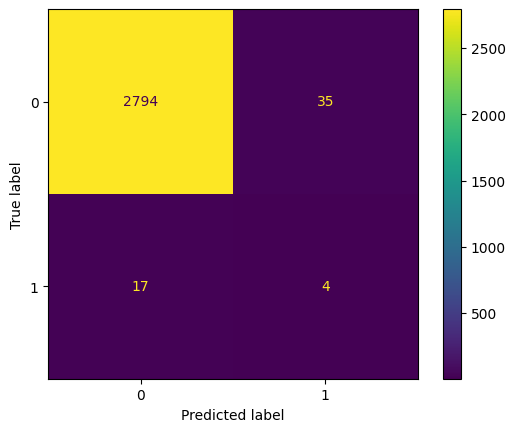

In [35]:
from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    ConfusionMatrixDisplay,
    f1_score,
)

y_pred = model.predict(x_test)

accuracy = accuracy_score(y_test, y_pred)

f1 = f1_score(y_test, y_pred, average="weighted")

cm = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

print("Accuracy for Naive Bayes:", accuracy)
print("F1 Score for Naive Bayes:", f1)

In [36]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
clf = SVC(kernel='rbf', random_state=42)

clf.fit(x_train, y_train)

y_pred = clf.predict(x_test)

# Evaluate the classifier
print("Accuracy for SVM :", accuracy_score(y_test, y_pred))
print("Confusion Matrix for SVM:\n", confusion_matrix(y_test, y_pred))
print("Classification Report of SVM :\n", classification_report(y_test, y_pred))

Accuracy for SVM : 0.9926315789473684
Confusion Matrix for SVM:
 [[2829    0]
 [  21    0]]
Classification Report of SVM :
               precision    recall  f1-score   support

         0.0       0.99      1.00      1.00      2829
         1.0       0.00      0.00      0.00        21

    accuracy                           0.99      2850
   macro avg       0.50      0.50      0.50      2850
weighted avg       0.99      0.99      0.99      2850



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


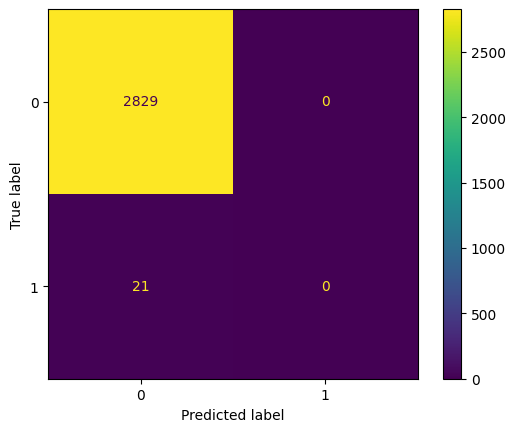

In [37]:
cm =  confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()